In [1]:
!nvidia-smi

Tue Jun 20 18:43:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.108.03   Driver Version: 510.108.03   CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:27:00.0 Off |                    0 |
| N/A   34C    P0    39W / 250W |   5281MiB / 40960MiB |     15%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-PCI...  On   | 00000000:A3:00.0 Off |                    0 |
| N/A   

In [4]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import cv2


In [21]:
mask = cv2.imread('/home/infres/nvernier-22/project/LPCVC-2023/dataset/train/GT/train_0001.png')

In [22]:
np.unique(mask)

array([ 0,  2,  5, 12], dtype=uint8)

In [23]:

from torchvision import transforms as T
import PIL
t_train = T.Compose([T.ToPILImage(), T.Resize(128, interpolation=PIL.Image.NEAREST)])

/home/infres/nvernier-22/anaconda3/envs/lpcvc/lib/python3.6/site-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [24]:
mask_t = t_train(mask)

In [25]:
np.unique(mask_t)

array([ 0,  2,  5, 12], dtype=uint8)

In [26]:
import torch
target = torch.as_tensor(np.array(mask_t), dtype=torch.int64)

In [28]:
np.unique(target)

array([ 0,  2,  5, 12])

In [19]:
np.unique(mask_t)

array([0.        , 0.00784314, 0.01960784, 0.04705882], dtype=float32)

In [3]:
num_images_to_display = 10

fig = plt.figure(figsize=(16, 8))

for i in range(num_images_to_display):
    image_file = os.path.join(folder_path_label, image_files_label[i])
    image = np.asarray(Image.open(image_file))

    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(image, vmin=0, vmax=15, cmap='jet', aspect='auto')
    ax.axis("off")

plt.show()

NameError: name 'image_files_label' is not defined

<Figure size 1152x576 with 0 Axes>

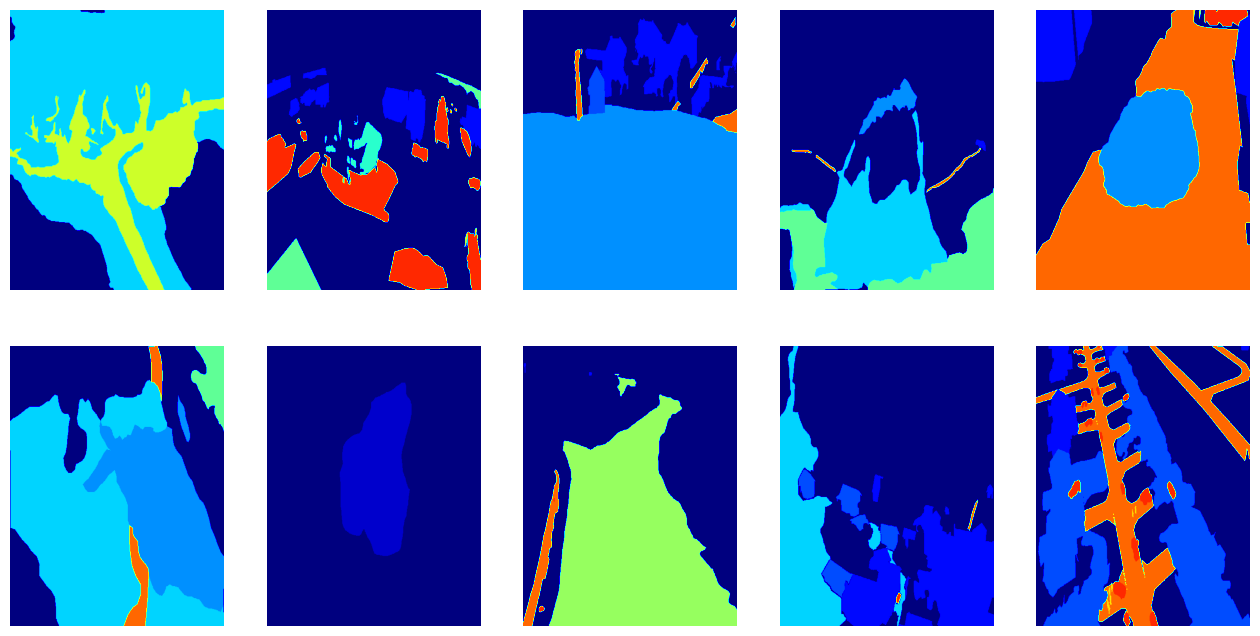

In [34]:
num_images_to_display = 10

fig = plt.figure(figsize=(16, 8))

for i in range(num_images_to_display):
    image_file = os.path.join(folder_path, image_files[i])
    image = np.asarray(Image.open(image_file))[:,:,0]

    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(image, vmin=0, vmax=15, cmap='jet', aspect='auto')
    ax.axis("off")

plt.show()

In [1]:
import torch

/home/infres/nvernier-22/anaconda3/envs/lpcvc/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
 torch.cuda.device_count()

3

In [4]:
torch.cuda.current_device()

/home/infres/nvernier-22/anaconda3/envs/lpcvc/lib/python3.6/site-packages/torch/cuda/__init__.py:143: UserWarning: 
NVIDIA A100-PCIE-40GB with CUDA capability sm_80 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA A100-PCIE-40GB GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


0

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA A100-PCIE-40GB'